<a href="https://colab.research.google.com/github/G33kyGuy3/DataSci/blob/main/Naive_Bayes_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Load the data
attrition_data = pd.read_excel("/content/Employee Attrition Data.xlsx")

In [7]:
# Store data in a dataframe
df = pd.read_excel("/content/Employee Attrition Data.xlsx")

#Print the first 7 rows of data
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Non-Travel,247,Research & Development,7,1,Life Sciences,1,1035,2,Female,55,1,5,Research Director,3,Divorced,19973,20284,1,Y,No,22,4,2,80,2,21,3,3,21,16,5,10
1,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1,1038,1,Female,57,1,5,Manager,4,Married,19845,25846,1,Y,No,15,3,4,80,1,33,3,3,32,14,6,9
2,39,No,Travel_Frequently,1218,Research & Development,1,1,Life Sciences,1,531,2,Male,52,3,5,Manager,3,Divorced,19197,8213,1,Y,Yes,14,3,3,80,1,21,3,3,21,8,1,6
3,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1941,2,Male,42,3,5,Research Director,4,Married,19161,13738,3,Y,No,15,3,4,80,0,28,3,3,5,4,4,3
4,50,No,Travel_Rarely,797,Research & Development,4,1,Life Sciences,1,385,1,Male,96,3,5,Research Director,2,Divorced,19144,15815,3,Y,No,14,3,1,80,2,28,4,2,10,4,1,6
5,40,No,Travel_Rarely,989,Research & Development,4,1,Medical,1,253,4,Female,46,3,5,Manager,3,Married,19033,6499,1,Y,No,14,3,2,80,1,21,2,3,20,8,9,9
6,42,No,Non-Travel,495,Research & Development,2,1,Life Sciences,1,1334,3,Male,37,3,4,Manager,3,Married,17861,26582,0,Y,Yes,13,3,4,80,0,21,3,2,20,8,2,10


In [15]:
#Defining input and output features as X and y respectively; the column indices may be changed based on the data set
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [24]:
X

array([[  0,  94],
       [  2, 107],
       [  1, 697],
       ...,
       [  2, 190],
       [  1, 354],
       [  2, 744]])

In [25]:
y

array([1, 2, 1, ..., 1, 1, 1])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9) #Split the dataset

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Transform the data
#Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [18]:
#Training the Classifer and making prediction

# Fitting Naive Bayes Classifier to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [20]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


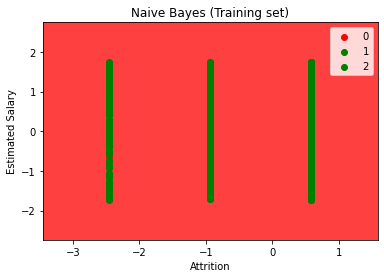

In [26]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Attrition')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


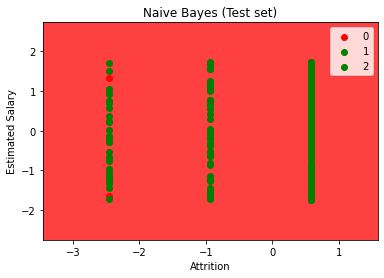

In [27]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Attrition')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()